# THOMAS NGO
# TEVIN VU
# PROJECT 5

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from keras import models
from keras.activations import relu, sigmoid, tanh, softmax
from keras.layers import Dense, LeakyReLU, BatchNormalization, Dropout, Activation, ReLU
from keras.callbacks import EarlyStopping
from keras.regularizers import l1, l2, l1_l2
from keras.wrappers.scikit_learn import KerasClassifier
from keras.preprocessing.image import ImageDataGenerator

from sklearn.preprocessing import minmax_scale, StandardScaler
from sklearn.model_selection import GridSearchCV

### 1. Use plt.imshow() to verify that the image data has been loaded correctly and that the corresponding labels are correct.

In [ ]:
datasets = np.load('emnist_letters.npz')
train_images, train_labels  = datasets['train_images'], datasets['train_labels']
test_images, test_labels = datasets['test_images'], datasets['test_labels']
validate_images, validate_labels = datasets['validate_images'], datasets['validate_labels']
dataset_shape = datasets['train_images'].shape

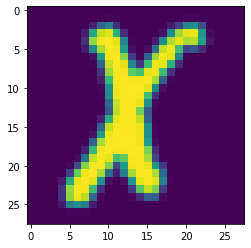

In [ ]:
plt.imshow(train_images[5435].reshape(28,28))

In [ ]:
print(chr(np.argmax(train_labels[5435]) - 1 + ord('A')))
# print(chr(np.argmax(datasets['train_labels'][0]) - 1 + ord('A')))

X


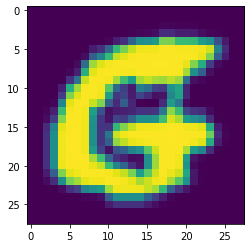

In [ ]:
plt.imshow(train_images[1].reshape(28,28))

In [ ]:
print(train_labels.shape)


(104000, 27)


In [ ]:
print(chr(np.argmax(train_labels[1]) - 1 + ord('A')))

G


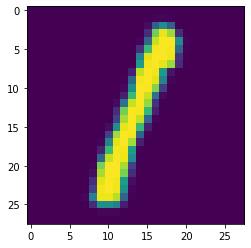

In [ ]:
plt.imshow(validate_images[1].reshape(28,28))

In [ ]:
print(chr(np.argmax(validate_labels[1]) - 1 + ord('A')))

L


In [ ]:
print(validate_labels.shape)
print(validate_images.shape)

(20800, 27)
(20800, 784)


### 2. Begin by applying the network architecture from Chollet’s MNIST notebook to the EMNIST Letters data. What accuracy do you achieve? How does this compare with the accuracy for MNIST?. 

In [ ]:
train_images.shape

(104000, 784)

In [ ]:
test_images.shape

(20800, 784)

In [ ]:
len(train_labels)

104000

In [ ]:
test_labels.shape

(20800, 27)

In [ ]:
len(test_labels)

20800

In [ ]:
test_labels

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [ ]:
model = models.Sequential()
model.add(Dense(10000, activation='relu', input_shape=(28*28,)))
model.add(Dense(27, activation='softmax'))

In [ ]:
model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
# model.fit(train_images, train_labels, epochs=5, batch_size=128, validation_split=0.1)
model.fit(train_images, train_labels, epochs=5, batch_size=128, validation_data=(validate_images,validate_labels))

Epoch 1/5
813/813 [==============================] - 60s 74ms/step - loss: 1.5512 - accuracy: 0.7558 - val_loss: 1.8577 - val_accuracy: 0.5045
Epoch 2/5
813/813 [==============================] - 64s 79ms/step - loss: 1.8580 - accuracy: 0.8354 - val_loss: 1.9176 - val_accuracy: 0.5334
Epoch 3/5
813/813 [==============================] - 56s 69ms/step - loss: 2.5545 - accuracy: 0.8617 - val_loss: 1.8841 - val_accuracy: 0.5346
Epoch 4/5
813/813 [==============================] - 53s 65ms/step - loss: 2.4383 - accuracy: 0.8776 - val_loss: 1.4378 - val_accuracy: 0.6180
Epoch 5/5
813/813 [==============================] - 53s 66ms/step - loss: 3.5820 - accuracy: 0.8886 - val_loss: 1.8180 - val_accuracy: 0.5684


In [ ]:
test_lost, test_acc = model.evaluate(test_images, test_labels)

650/650 [==============================] - 2s 4ms/step - loss: 3.8331 - accuracy: 0.8735


What accuracy do you achieve?

In [ ]:
print('Test Accuracy: ', test_acc)
orginal_model_acc = test_acc

Test Accuracy:  0.8735095858573914


How does this compare with the accuracy for MNIST? 
- This accuracy is less than MNIST.

### 4. Once you have settled on the size of the hidden layer, use the techniques you learned in Chapters 3 and 4 of the textbook to obtain the highest accuracy you can on the validation set. These might include:

  - Preprocessing
  - Weight initialization
  - Choice of activation function
  - Optimizer
  - Batch Normalization
  - Regularization
  - Data augmentation
  - Dropout
  - Early Stopping

You may find the slides for Chapter 3 helpful, particularly the presentation “Neural Network Training [Initialization, Preprocessing, Mini-Batching, Tuning, and Other Black Art].”

In [ ]:
# Preprocessing data input

# using sklearn min-max scaler
# train_images = minmax_scale(train_images)
# test_images = minmax_scale(test_images)

# using sklearn standard scaler
X_scaler = StandardScaler().fit(train_images)
train_images = X_scaler.transform(train_images)
Y_scaler = StandardScaler().fit(test_images)
test_images = Y_scaler.transform(test_images)

# attempting to implement min-max scaling, problem with invalid division when max and min are zeroes, ask professor
# max_mat = train_images.max(axis=0)
# min_mat = train_images.min(axis=0)
# print(max_mat.shape)
# print(min_mat.shape)
# train_images -= min_mat
# train_images /= (max_mat - min_mat)
# print(f'max_mat: {max_mat}')
# print(f'min_mat: {min_mat}')

# attempting to implement standardization, same problem with implemenation of min-max scaling
# mean = train_images.mean(axis=0)
# train_images -= mean
# print('train_images after subtracing mean: {train_images}')
# std = train_images.std(axis=0)
# # std = np.sqrt(2/(784+37))
# print(f'std: {std}')
# train_images /= std
# test_images -= mean
# test_images /= std

In [ ]:
# define model with batch normalization
def define_model(func_name='relu', 
                 kernel_initializer='glorot_normal', 
                 batch_size=128,
                 epochs=5,
                 optimizer='rmsprop'):
  # build model
  model = models.Sequential()
  model.add(Dense(1000,
                  kernel_initializer=kernel_initializer,
                  use_bias=False))
  model.add(BatchNormalization())
  model.add(Activation(func_name))
  model.add(Dense(27, activation='softmax'))
  # compile mode
  model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
  return model


In [ ]:
# create params dictionary for gridsearch
func_names = ['relu', 'tanh', 'sigmoid']
optimizers = ['rmsprop', 'sgd', 'adam', 'adadelta', 'adagrad']
kernel_initializers= ['glorot_uniform', 'glorot_normal']
batch_sizes = [128, 256, 512]
parmam_grid = dict(optimizer=optimizers, 
                   func_name=func_names, 
                   batch_size=batch_sizes, 
                   kernel_initializer=kernel_initializers)
print(parmam_grid)

{'optimizer': ['rmsprop', 'sgd', 'adam', 'adadelta', 'adagrad'], 'func_name': ['relu', 'tanh', 'sigmoid'], 'batch_size': [128, 256, 512], 'kernel_initializer': ['glorot_uniform', 'glorot_normal']}


In [ ]:
# create model
model = KerasClassifier(build_fn=define_model)

# perform gridsearch
grid = GridSearchCV(estimator=model, param_grid=parmam_grid, verbose=1)
grid_res = grid.fit(train_images, train_labels)

print(f'Best accuracy: {grid_res.best_score_} using {grid_res.best_params_}')

Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


41/41 [==============================] - 0s 4ms/step - loss: 3.0268 - accuracy: 0.2195


[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed: 20.2min finished


813/813 [==============================] - 4s 4ms/step - loss: 0.8852 - accuracy: 0.7399
Best accuracy: 0.8567115426063537 using {'batch_size': 128, 'func_name': 'relu', 'kernel_initializer': 'glorot_uniform', 'optimizer': 'rmsprop'}


In [ ]:
print(f'Best accuracy: {grid_res.best_score_} using {grid_res.best_params_}')

Best accuracy: 0.8567115426063537 using {'batch_size': 128, 'func_name': 'relu', 'kernel_initializer': 'glorot_uniform', 'optimizer': 'rmsprop'}


In [ ]:
# define model with dropout
def define_model_2(func_name='relu', 
                   kernel_initializer='glorot_normal', 
                   batch_size=128,
                   epochs=100,
                   dropout_rate=0.5,
                   optimizer='rmsprop'):
    # build model
    model = models.Sequential()
    model.add(Dense(1000,
                    activation=func_name,
                    kernel_initializer=kernel_initializer,
                    use_bias=True))
    model.add(Dense(27, activation='softmax'))
    model.add(Dropout(dropout_rate))
    # compile model
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
# create params dictionary for gridsearch
func_names = ['relu', 'tanh', 'sigmoid']
optimizers = ['rmsprop', 'sgd', 'adam', 'adadelta', 'adagrad']
kernel_initializers= ['glorot_uniform', 'glorot_normal']
batch_sizes = [128, 256, 512]
dropout_rates = [0.2, 0.5]
parmam_grid = dict(optimizer=optimizers, 
                   func_name=func_names, 
                   batch_size=batch_sizes,
                   dropout_rate=dropout_rates,
                   kernel_initializer=kernel_initializers)
print(parmam_grid)

{'optimizer': ['rmsprop', 'sgd', 'adam', 'adadelta', 'adagrad'], 'func_name': ['relu', 'tanh', 'sigmoid'], 'batch_size': [128, 256, 512], 'dropout_rate': [0.2, 0.5], 'kernel_initializer': ['glorot_uniform', 'glorot_normal']}


In [ ]:
# create model
model = KerasClassifier(build_fn=define_model_2)

# perform gridsearch
grid = GridSearchCV(estimator=model, param_grid=parmam_grid, verbose=1)
grid_res = grid.fit(train_images, train_labels)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


41/41 [==============================] - 0s 3ms/step - loss: 3.2603 - accuracy: 0.0658


[Parallel(n_jobs=1)]: Done 900 out of 900 | elapsed: 29.6min finished


813/813 [==============================] - 2s 3ms/step - loss: 3.9740 - accuracy: 0.5792


In [ ]:
print(f'Best accuracy: {grid_res.best_score_} using {grid_res.best_params_}')

Best accuracy: 0.8521057605743408 using {'batch_size': 128, 'dropout_rate': 0.2, 'func_name': 'relu', 'kernel_initializer': 'glorot_uniform', 'optimizer': 'adam'}


In [ ]:
# building model - this model has the best performance so far
model = models.Sequential()
model.add(Dense(10000,
                # activation=LeakyReLU(alpha=0.01), 
                # activation='relu',
                input_shape=(28*28,),
                kernel_initializer='glorot_normal',
                # kernel_regularizer=l2(0.01),
                use_bias=True)) # set False if BatchNormalization is used and remove dropout
# model.add(BatchNormalization()) # pre-activation normalization
model.add(LeakyReLU(alpha=0.01))
# model.add(Activation(relu))
model.add(Dropout(0.2)) # don't use this when using with BatchNormalization??
model.add(Dense(27, activation='softmax'))

In [ ]:
# compile model
model.compile(
    optimizer='adam',
              # optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# fit model
callback = EarlyStopping(monitor='accuracy', 
                         patience=5,
                        #  restore_best_weights=False)
                         restore_best_weights=True)

model.fit(train_images, 
          train_labels, 
          epochs=100, 
          batch_size=256, 
          # batch_size=128,
          validation_data=(validate_images,validate_labels),
          callbacks=[callback],
          verbose=1)

Epoch 1/100
407/407 [==============================] - 3s 7ms/step - loss: 0.9177 - accuracy: 0.7274 - val_loss: 0.3888 - val_accuracy: 0.8759
Epoch 2/100
407/407 [==============================] - 3s 7ms/step - loss: 0.3361 - accuracy: 0.8909 - val_loss: 0.3272 - val_accuracy: 0.8998
Epoch 3/100
407/407 [==============================] - 3s 7ms/step - loss: 0.2559 - accuracy: 0.9152 - val_loss: 0.3098 - val_accuracy: 0.9021
Epoch 4/100
407/407 [==============================] - 3s 7ms/step - loss: 0.2123 - accuracy: 0.9278 - val_loss: 0.2990 - val_accuracy: 0.9051
Epoch 5/100
407/407 [==============================] - 3s 7ms/step - loss: 0.1811 - accuracy: 0.9360 - val_loss: 0.2920 - val_accuracy: 0.9117
Epoch 6/100
407/407 [==============================] - 3s 7ms/step - loss: 0.1598 - accuracy: 0.9429 - val_loss: 0.3121 - val_accuracy: 0.9060
Epoch 7/100
407/407 [==============================] - 3s 7ms/step - loss: 0.1439 - accuracy: 0.9474 - val_loss: 0.2899 - val_accuracy: 0.9144

In [ ]:
# run model against TEST SET
test_lost, test_acc = model.evaluate(test_images, test_labels)

# get accuracy
print('Test Accuracy: ', test_acc)
modified_model_acc = test_acc

650/650 [==============================] - 1s 2ms/step - loss: 0.6243 - accuracy: 0.9125
Test Accuracy:  0.9125480651855469


In [ ]:
print(f'Improvement/Loss accuracy: {(modified_model_acc - orginal_model_acc)*100}')

Improvement/Loss accuracy: 1.1778831481933594


(28, 28, 1)


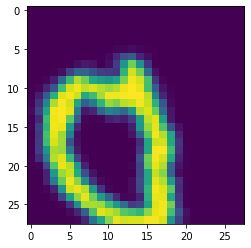

In [ ]:
# attempt to do augmentation
# inspired from https://machinelearningmastery.com/how-to-configure-image-data-augmentation-when-training-deep-learning-neural-networks/

X_train = train_images.reshape(104000, 28, 28, 1)
datagen = ImageDataGenerator(featurewise_center=True,
                             featurewise_std_normalization=True,
                             rotation_range=40,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             horizontal_flip=True)
datagen.fit(X_train)
it = datagen.flow(X_train, train_labels)

print(it[0][0][0].shape)
# print(it[0][0][0])
plt.imshow(it[0][0][0].reshape(28,28))

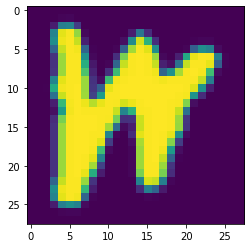

In [ ]:
# original image
plt.imshow(train_images[0].reshape(28,28))

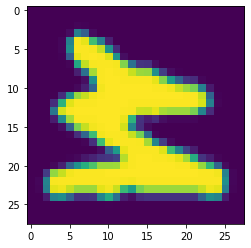

In [ ]:
test_rotate_0 = np.rot90(train_images[0].reshape(28,28))
plt.imshow(test_rotate_0)

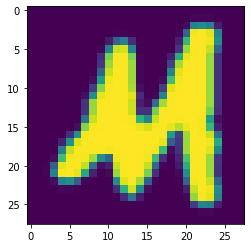

In [ ]:
test_flip_0 = np.flip(train_images[0].reshape(28,28))
plt.imshow(test_flip_0)

(104369, 784)
0.172208333121981
0.1691730473768439


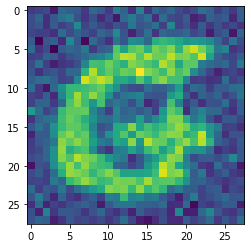

In [ ]:
print(train_images.shape)
print(train_images.mean(axis=0).mean(axis=0))
mean = train_images.mean(axis=0).mean(axis=0)
print(train_images.std(axis=0).std(axis=0))
std = train_images.std(axis=0).std(axis=0)
noise = np.random.normal(mean, std, train_images.shape)
test_add_noise = train_images + noise
plt.imshow(test_add_noise[1].reshape(28,28))

In [ ]:
# this takes too long
train_images_shape = train_images.shape
for i in range(train_images_shape[0]):
  curr_rotate_img = np.rot90(train_images[i].reshape(28,28))
  curr_rotate_img = curr_rotate_img.reshape(28*28,)
#   print(curr_rotate_img.shape)
#   train_images = np.append(train_images, [curr_rotate_img], axis=0)

### 5. Add additional Dense hidden layers as appropriate to improve the accuracy. Note that you may need to adjust your hyperparameters or other aspects of the network architecture in response to these changes. How does the accuracy for your deep network compare with the accuracy you achieved in experiment (4)?.

In [ ]:
# build model
model = models.Sequential()
model.add(Dense(10000,
                input_shape=(28*28,),
                kernel_initializer='glorot_normal',
                # kernel_regularizer=l2(0.01),
                use_bias=True)) # set False if BatchNormalization is used and remove dropout
model.add(LeakyReLU(alpha=0.01))
model.add(Dropout(0.2))
model.add(Dense(10000,
                activation='relu',
                input_shape=(28*28,)))
model.add(Dropout(0.2))
model.add(Dense(27, activation='softmax'))

In [ ]:
# compile model
model.compile(
    optimizer='adam',
              # optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# fit model
callback = EarlyStopping(monitor='accuracy', 
                         patience=5,
                        #  restore_best_weights=False)
                         restore_best_weights=True)

model.fit(train_images, 
          train_labels, 
          epochs=100, 
          batch_size=256, 
          # batch_size=128,
          validation_data=(validate_images,validate_labels),
          callbacks=[callback],
          verbose=1)

Epoch 1/100
407/407 [==============================] - 311s 765ms/step - loss: 0.8969 - accuracy: 0.7767 - val_loss: 1.6290 - val_accuracy: 0.5188
Epoch 2/100
407/407 [==============================] - 283s 695ms/step - loss: 0.4283 - accuracy: 0.8657 - val_loss: 1.4360 - val_accuracy: 0.6403
Epoch 3/100
407/407 [==============================] - 290s 712ms/step - loss: 0.3911 - accuracy: 0.8777 - val_loss: 1.2600 - val_accuracy: 0.6957
Epoch 4/100
407/407 [==============================] - 310s 761ms/step - loss: 0.3662 - accuracy: 0.8837 - val_loss: 1.2593 - val_accuracy: 0.6359
Epoch 5/100
407/407 [==============================] - 310s 761ms/step - loss: 0.3608 - accuracy: 0.8860 - val_loss: 1.3678 - val_accuracy: 0.6013
Epoch 6/100
407/407 [==============================] - 309s 758ms/step - loss: 0.3426 - accuracy: 0.8923 - val_loss: 1.1040 - val_accuracy: 0.7042
Epoch 7/100
407/407 [==============================] - 309s 759ms/step - loss: 0.3300 - accuracy: 0.8970 - val_loss: 1

407/407 [==============================] - 271s 665ms/step - loss: 0.2245 - accuracy: 0.9400 - val_loss: 1.3627 - val_accuracy: 0.7096
Epoch 57/100
407/407 [==============================] - 271s 665ms/step - loss: 0.2240 - accuracy: 0.9406 - val_loss: 1.0390 - val_accuracy: 0.7462


In [ ]:
# run model against TEST SET
test_lost, test_acc = model.evaluate(test_images, test_labels)

# get accuracy
print('Test Accuracy: ', test_acc)
deep_net_model_acc = test_acc

650/650 [==============================] - 2s 4ms/step - loss: 3.8331 - accuracy: 0.8735
Test Accuracy:  0.8735095858573914


In [ ]:
print(f'Improvement/Loss accuracy: {(deep_net_model_acc - orginal_model_acc)*100}')

Improvement/Loss accuracy: 0.0
